In [1]:
%load_ext autoreload
%autoreload 2

from util import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
NT = 467 #int(sys.argv[1])
NR = 801 #int(sys.argv[2])

In [3]:
model, xx, zz = readin_bin(r"./Models/model_vp_52.bin", seek_num=0, nt=NT, nr=NR, dx=10, dz=10)
print(model.shape)
print(xx.shape)
print(zz.shape)

(467, 801)
(467, 801)
(467, 801)


In [4]:
# np.savez('Model_52.npz', xx=xx, zz=zz, vp=model)

In [5]:
print(type(model))
print(model.shape)

<class 'numpy.ndarray'>
(467, 801)


In [6]:
nsrc = 10
src = np.empty((nsrc, 2))
src[:, 0] = np.arange(3100,5000,200)
src[:, 1] = 0.

nrec = 201
rec = np.empty((nrec, 2))
rec[:,0] = 4000.
rec[:,1] = np.linspace(1000,3000,num=nrec)

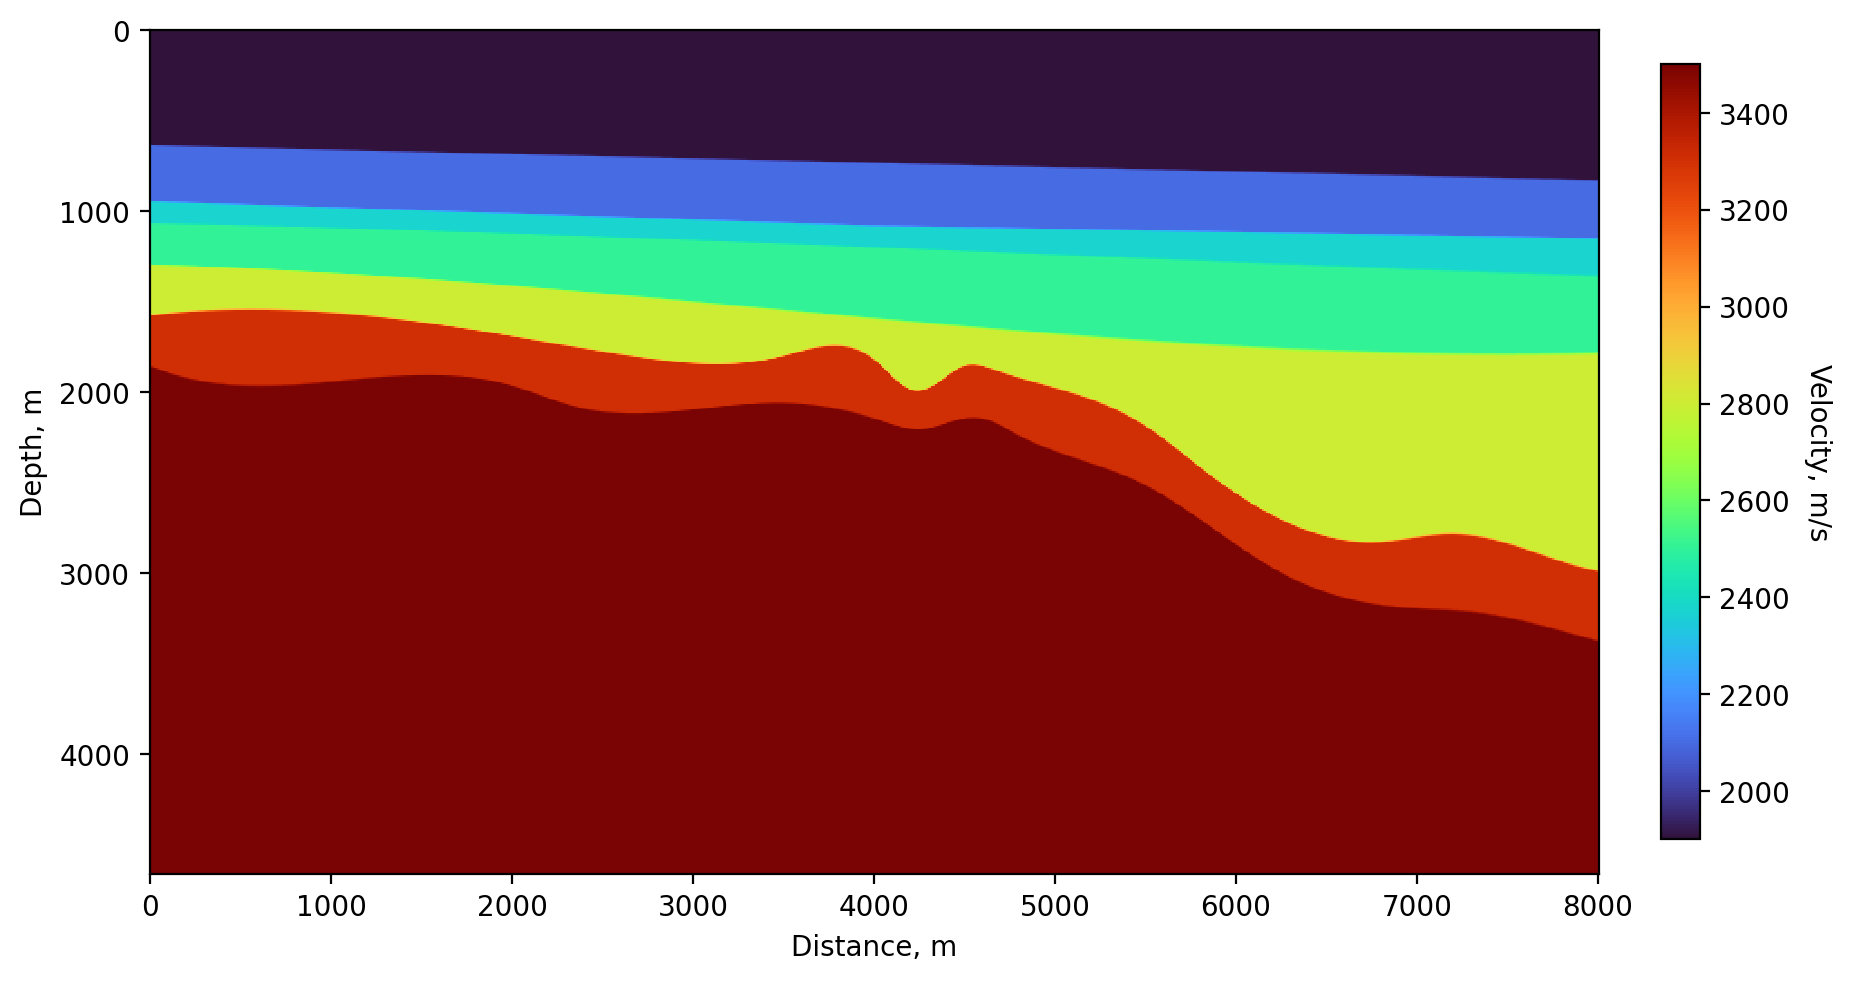

In [7]:
plot_model(np.round(model, -1), xx, zz, rec=None, src=None, show=True)

In [28]:
xx_l = np.copy(xx)
zz_l = np.copy(zz)

In [29]:
idx_pass = (model>3000) & (model < 3500)

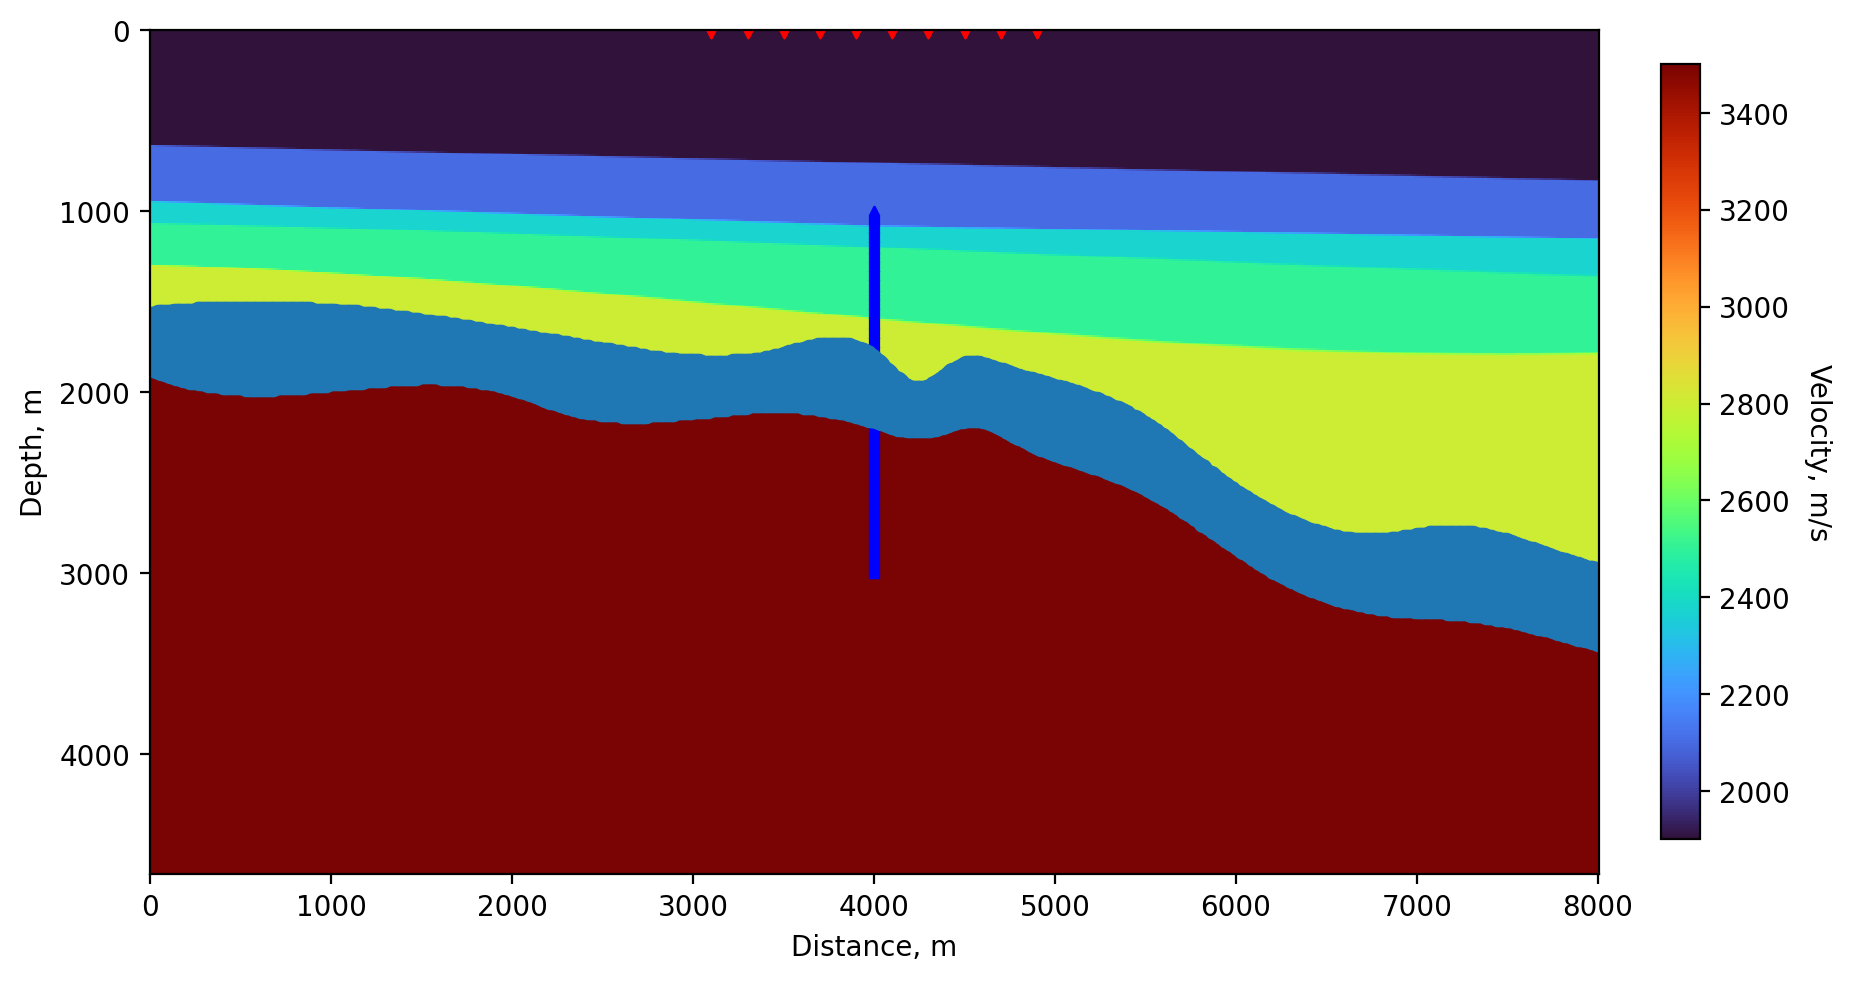

In [31]:
axs = plot_model(np.round(model, -1), xx, zz, rec=rec, src=src)
axs.scatter(xx[idx_pass].ravel(), zz[idx_pass].ravel())
plt.show()

In [34]:
xx_l[~idx_pass] = np.nan
zz_l[~idx_pass] = np.nan
refl = np.nanargmin(zz_l, axis=0)
print(refl.size)

801


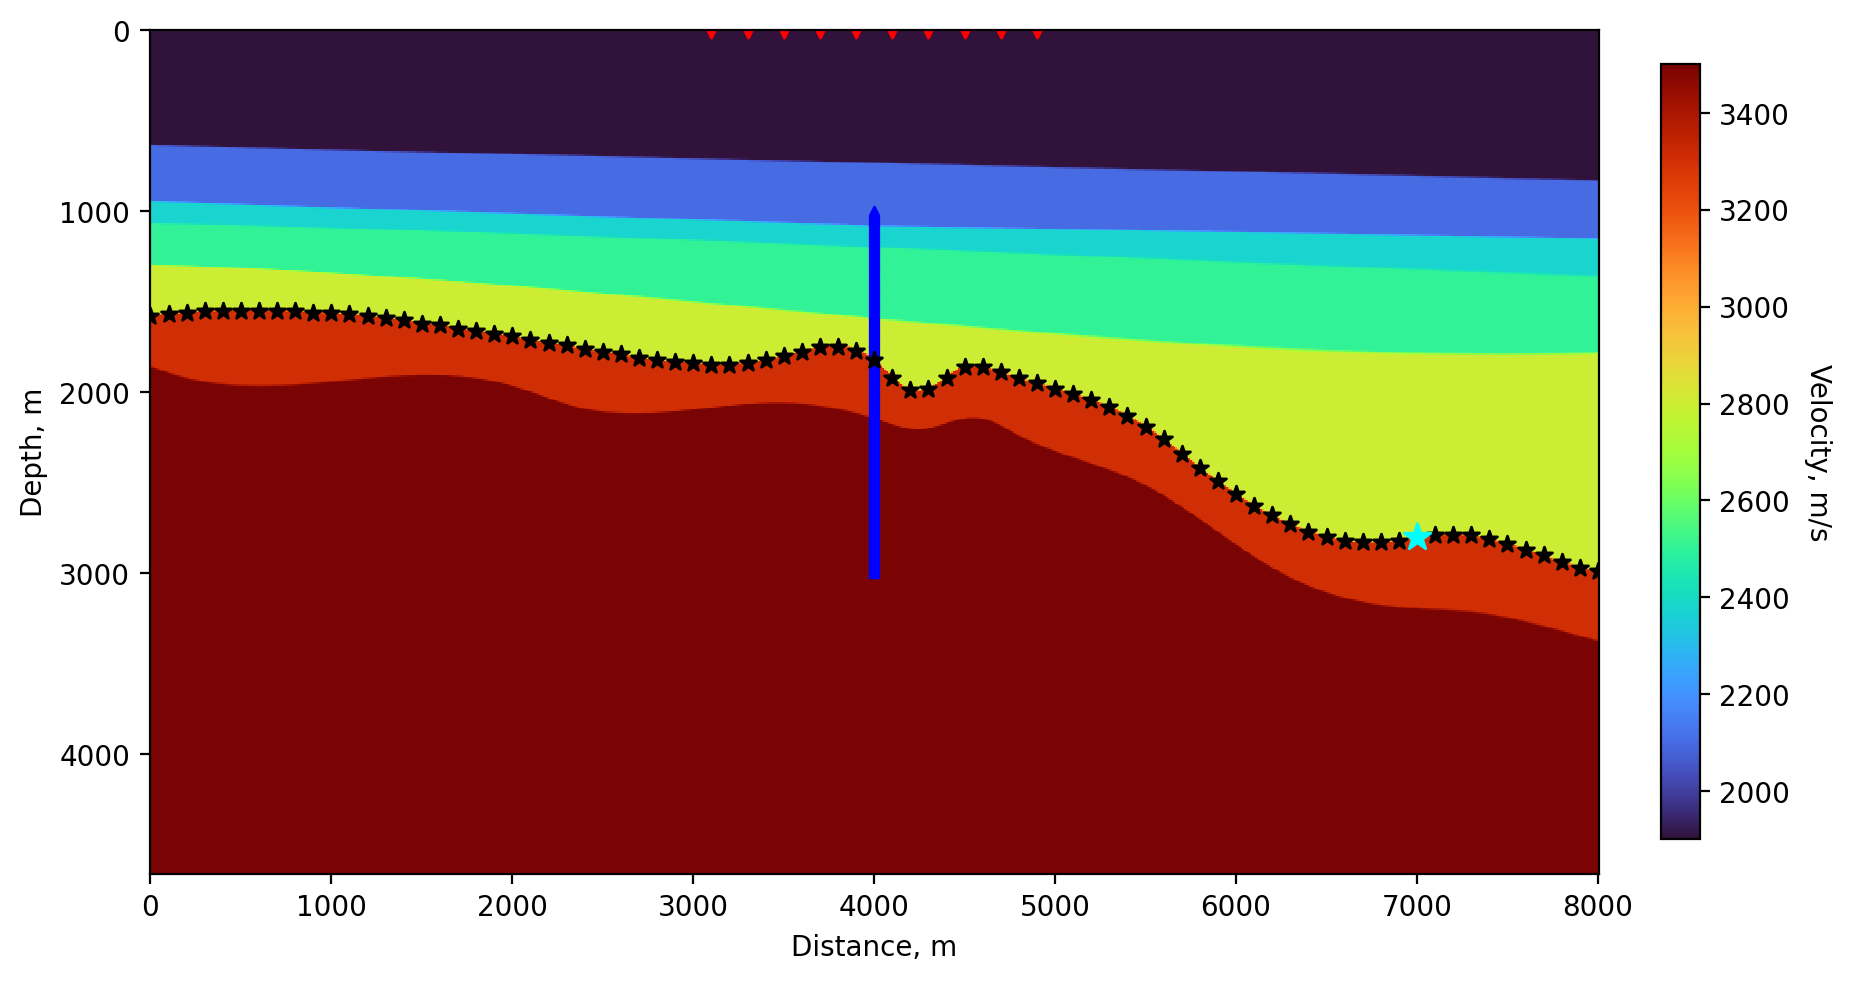

In [70]:
axs = plot_model(np.round(model, -1), xx, zz, rec=rec, src=src)
stepn = 10
for i, id in enumerate(refl[::stepn]):
    axs.scatter(xx[id, i*stepn], zz[id, i*stepn], marker="*", c='k')
i = 70
axs.scatter(xx[refl[i*stepn], i*stepn], zz[refl[i*stepn], i*stepn], s=100, marker="*", c='cyan')
plt.show()

In [51]:
x_refl = [xx[id, i*stepn] for i, id in enumerate(refl[::stepn])]
z_refl = [zz[id, i*stepn] for i, id in enumerate(refl[::stepn])]
numdifr = [i for i, id in enumerate(refl[::stepn])]
print(x_refl)
print(z_refl)

[0.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.0, 3100.0, 3200.0, 3300.0, 3400.0, 3500.0, 3600.0, 3700.0, 3800.0, 3900.0, 4000.0, 4100.0, 4200.0, 4300.0, 4400.0, 4500.0, 4600.0, 4700.0, 4800.0, 4900.0, 5000.0, 5100.0, 5200.0, 5300.0, 5400.0, 5500.0, 5600.0, 5700.0, 5800.0, 5900.0, 6000.0, 6100.0, 6200.0, 6300.0, 6400.0, 6500.0, 6600.0, 6700.0, 6800.0, 6900.0, 7000.0, 7100.0, 7200.0, 7300.0, 7400.0, 7500.0, 7600.0, 7700.0, 7800.0, 7900.0, 8000.0]
[1580.0, 1570.0, 1560.0, 1550.0, 1550.0, 1550.0, 1550.0, 1550.0, 1550.0, 1560.0, 1560.0, 1570.0, 1580.0, 1590.0, 1600.0, 1620.0, 1630.0, 1650.0, 1660.0, 1680.0, 1690.0, 1710.0, 1730.0, 1740.0, 1760.0, 1780.0, 1790.0, 1810.0, 1820.0, 1830.0, 1840.0, 1850.0, 1850.0, 1840.0, 1820.0, 1800.0, 1780.0, 1750.0, 1750.0, 1770.0, 1820.0, 1920.0, 1990.0, 1980.0, 1920.0, 18

In [53]:
df_query = pd.DataFrame(np.array([x_refl, z_refl, numdifr]).T, columns=['X', 'Z', 'NumDifr'])
df_query

,X,Z,NumDifr
0,0.0,1580.0,0.0
1,100.0,1570.0,1.0
2,200.0,1560.0,2.0
3,300.0,1550.0,3.0
4,400.0,1550.0,4.0
...,...,...,...
76,7600.0,2870.0,76.0
77,7700.0,2900.0,77.0
78,7800.0,2940.0,78.0
79,7900.0,2970.0,79.0


In [ ]:
# df.loc[df['Courses'].isin(values)]

In [42]:
df_r = pd.read_csv(r"C:\!RADEX\2024.11 - Лекция по ВСП\Green_R_52.txt", sep=' ')
df_r

,REC_X,REC_ELEV,X,Z,TRAV_S
0,4000.0,1000.0,0.0,0.0,1961.678460
1,4000.0,1000.0,10.0,0.0,1957.795940
2,4000.0,1000.0,20.0,0.0,1953.912477
3,4000.0,1000.0,30.0,0.0,1950.028485
4,4000.0,1000.0,40.0,0.0,1946.143959
...,...,...,...,...,...
75187462,4000.0,3000.0,7960.0,4660.0,1227.437318
75187463,4000.0,3000.0,7970.0,4660.0,1230.072521
75187464,4000.0,3000.0,7980.0,4660.0,1232.708709
75187465,4000.0,3000.0,7990.0,4660.0,1235.345878


In [55]:
df_r_refl = pd.merge(df_r.reset_index(), df_query, on=['X', 'Z'], how='inner')
df_r_refl

,index,REC_X,REC_ELEV,X,Z,TRAV_S,NumDifr
0,124185,4000.0,1000.0,300.0,1550.0,1332.475449,3.0
1,498252,4000.0,1010.0,300.0,1550.0,1329.141127,3.0
2,872319,4000.0,1020.0,300.0,1550.0,1325.720055,3.0
3,1246386,4000.0,1030.0,300.0,1550.0,1322.394867,3.0
4,1620453,4000.0,1040.0,300.0,1550.0,1319.065551,3.0
...,...,...,...,...,...,...,...
16276,73557431,4000.0,2960.0,8000.0,2990.0,1168.817546,80.0
16277,73931498,4000.0,2970.0,8000.0,2990.0,1168.574509,80.0
16278,74305565,4000.0,2980.0,8000.0,2990.0,1168.340091,80.0
16279,74679632,4000.0,2990.0,8000.0,2990.0,1168.116567,80.0


In [57]:
df_r_refl.to_csv(r"C:\!RADEX\2024.11 - Лекция по ВСП\Green_R_52_Reflector_6.txt", sep=' ', index=False)

In [58]:
df_s = pd.read_csv(r"C:\!RADEX\2024.11 - Лекция по ВСП\Green_S_52.txt", sep=' ')
df_s

,SOU_X,SOU_ELEV,X,Z,TRAV_S
0,3100.0,0.0,0.0,0.0,1631.578947
1,3100.0,0.0,10.0,0.0,1626.315789
2,3100.0,0.0,20.0,0.0,1621.052632
3,3100.0,0.0,30.0,0.0,1615.789474
4,3100.0,0.0,40.0,0.0,1610.526316
...,...,...,...,...,...
3740665,4900.0,0.0,7960.0,4660.0,2028.213269
3740666,4900.0,0.0,7970.0,4660.0,2030.329077
3740667,4900.0,0.0,7980.0,4660.0,2032.449352
3740668,4900.0,0.0,7990.0,4660.0,2034.574073


In [59]:
df_s_refl = pd.merge(df_s.reset_index(), df_query, on=['X', 'Z'], how='inner')
df_s_refl

,index,SOU_X,SOU_ELEV,X,Z,TRAV_S,NumDifr
0,124185,3100.0,0.0,300.0,1550.0,1410.404405,3.0
1,498252,3300.0,0.0,300.0,1550.0,1477.188582,3.0
2,872319,3500.0,0.0,300.0,1550.0,1544.446891,3.0
3,1246386,3700.0,0.0,300.0,1550.0,1612.149962,3.0
4,1620453,3900.0,0.0,300.0,1550.0,1680.142286,3.0
...,...,...,...,...,...,...,...
805,2110634,4100.0,0.0,8000.0,2990.0,1962.944312,80.0
806,2484701,4300.0,0.0,8000.0,2990.0,1924.079883,80.0
807,2858768,4500.0,0.0,8000.0,2990.0,1889.078833,80.0
808,3232835,4700.0,0.0,8000.0,2990.0,1841.430844,80.0


In [60]:
df_s_refl.to_csv(r"C:\!RADEX\2024.11 - Лекция по ВСП\Green_S_52_Reflector_6.txt", sep=' ', index=False)